In [1]:
import pandas as pd
import numpy as np

In [2]:
at = pd.read_csv("attrition.csv")

In [3]:
at

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,Research & Development,Medical,3,Male,4,2,4,Married,2571,No,17,3,5,2,0,3,23
1466,39,0,Travel_Rarely,Research & Development,Medical,4,Male,2,3,1,Married,9991,No,9,3,7,7,1,7,6
1467,27,0,Travel_Rarely,Research & Development,Life Sciences,2,Male,4,2,2,Married,6142,Yes,6,3,6,2,0,3,4
1468,49,0,Travel_Frequently,Sales,Medical,4,Male,2,2,2,Married,5390,No,17,2,9,6,0,8,2


In [6]:
x = pd.crosstab(at.Gender , columns  = 'count')
columnsum = x.sum(axis = 0) 
round(x.div(columnsum/100 , axis = 1))

## 40% female
## 60 % male

col_0,count
Gender,
Female,40.0
Male,60.0


In [7]:
pd.crosstab(at.Department , columns  = 'count')

col_0,count
Department,
Human Resources,63
Research & Development,961
Sales,446


In [8]:
jl = pd.crosstab(at.JobLevel , columns = at.Attrition)
jl

Attrition,0,1
JobLevel,,
1,400,143
2,482,52
3,186,32
4,101,5
5,64,5


In [9]:
columnsum = jl.sum(axis = 0)
br = round(jl.div(columnsum/100 , axis = 1))
br

Attrition,0,1
JobLevel,,
1,32.0,60.0
2,39.0,22.0
3,15.0,14.0
4,8.0,2.0
5,5.0,2.0


In [10]:
rowsum = jl.sum(axis = 1)
rw = round(jl.div(rowsum/100 , axis = 0))
rw

Attrition,0,1
JobLevel,,
1,74.0,26.0
2,90.0,10.0
3,85.0,15.0
4,95.0,5.0
5,93.0,7.0


In [11]:
rowsum = jl.sum(axis = 1)
rowsum   ## just for understanding

JobLevel
1    543
2    534
3    218
4    106
5     69
dtype: int64

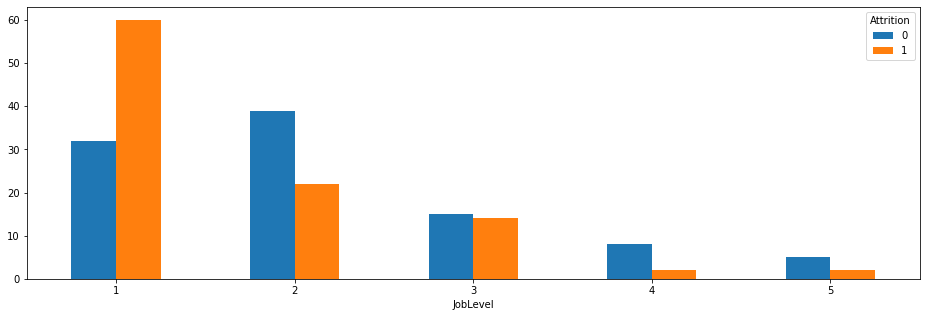

In [12]:
br.plot(kind = 'bar' ,rot=0 , figsize = [16,5])


#### we found aitration @ job level 1 most which is 60% of total airtation followed by job level 2 and three. 
#### There is no major effect of aitration on job level 4 and 5 
#### one forth of total employees who has worked @job level 1 has left the company

In [13]:
nf = at.copy()

In [14]:
nf.head(2)

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8


In [15]:
pd.crosstab(nf.Attrition , columns  = 'count')

## 1 = employee has left 
## 0 = employee is working in company


col_0,count
Attrition,
0,1233
1,237


In [16]:
pe = nf[nf.Attrition == 1]
pe

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
14,28,1,Travel_Rarely,Research & Development,Life Sciences,3,Male,2,1,3,Single,2028,Yes,6,3,4,2,0,3,24
21,36,1,Travel_Rarely,Sales,Life Sciences,3,Male,2,1,1,Single,3407,No,10,3,5,3,0,3,9
24,34,1,Travel_Rarely,Research & Development,Medical,2,Male,3,1,1,Single,2960,No,8,3,4,2,1,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,1,Travel_Frequently,Sales,Marketing,4,Male,3,1,1,Married,1790,No,1,2,1,0,1,0,9
1442,29,1,Travel_Rarely,Research & Development,Medical,1,Male,3,1,4,Married,4787,Yes,4,4,2,2,2,2,1
1444,56,1,Travel_Rarely,Research & Development,Technical Degree,4,Male,3,1,3,Married,2339,No,14,1,10,9,9,8,7
1452,50,1,Travel_Frequently,Sales,Life Sciences,2,Male,3,2,3,Divorced,6728,No,12,3,6,3,0,1,1


In [17]:
pd.crosstab(pe.Department , columns  = 'count')

col_0,count
Department,
Human Resources,12
Research & Development,133
Sales,92


In [18]:
pe.shape

(237, 20)

In [19]:
pe.describe()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,2.464135,2.518987,1.637131,2.468354,4787.092827,8.244726,2.658228,5.130802,2.902954,1.945148,2.852321,10.632911
std,9.689350,0.0,1.169791,0.773405,0.940594,1.118058,3640.210367,7.169204,0.816453,5.949984,3.174827,3.153077,3.143349,8.452525
min,18.000000,1.0,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,28.000000,1.0,1.000000,2.000000,1.000000,1.000000,2373.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.000000
50%,32.000000,1.0,3.000000,3.000000,1.000000,3.000000,3202.000000,7.000000,3.000000,3.000000,2.000000,1.000000,2.000000,9.000000
75%,39.000000,1.0,4.000000,3.000000,2.000000,3.000000,5916.000000,10.000000,3.000000,7.000000,4.000000,2.000000,5.000000,17.000000
max,58.000000,1.0,4.000000,4.000000,5.000000,4.000000,19859.000000,40.000000,4.000000,40.000000,15.000000,15.000000,14.000000,29.000000


In [20]:
b0 = pd.crosstab(pe.JobLevel , columns = pe.JobSatisfaction)
b0


JobSatisfaction,1,2,3,4
JobLevel,,,,
1,41,29,43,30
2,13,9,21,9
3,10,5,6,11
4,1,1,2,1
5,1,2,1,1


In [21]:
rowsum = b0.sum(axis = 1)
x = round(b0.div(rowsum/100 , axis = 0))
x    ## row sum is 100

JobSatisfaction,1,2,3,4
JobLevel,,,,
1,29.0,20.0,30.0,21.0
2,25.0,17.0,40.0,17.0
3,31.0,16.0,19.0,34.0
4,20.0,20.0,40.0,20.0
5,20.0,40.0,20.0,20.0


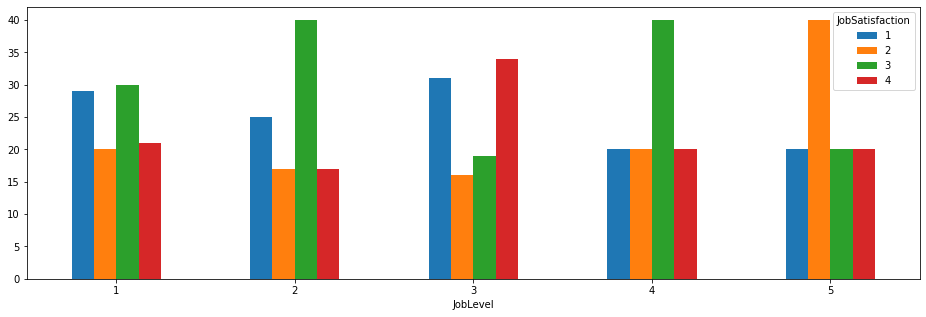

In [22]:
x.plot(kind = 'bar' ,rot=0 , figsize = [16,5])

In [23]:
plt.imshow(b0)
plt.xlabel('job satisfaction')
plt.ylabel('job level')
plt.show()

NameError: name 'plt' is not defined

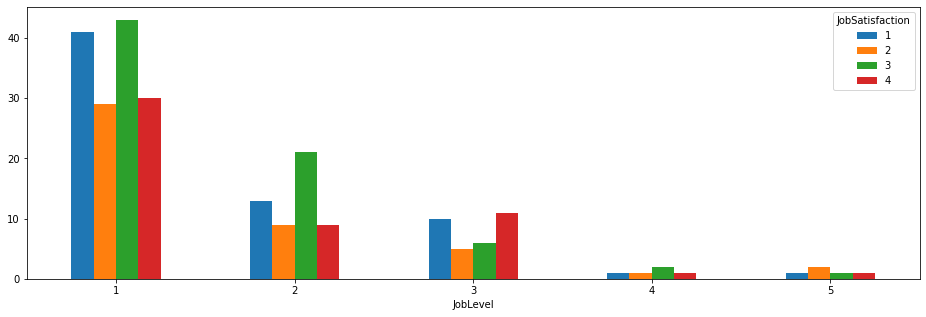

In [24]:
b0.plot(kind = 'bar' ,rot=0 , figsize = [16,5])

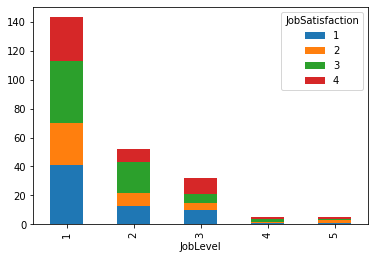

In [25]:
b0.plot(kind = 'bar' , stacked=True)  ## just for learning another way of represent

In [26]:
nf.head(2)

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8


In [27]:
u = pd.crosstab(pe.Gender , columns  = 'count')
u

col_0,count
Gender,
Female,87
Male,150


In [28]:
columnsum = u.sum(axis = 0) 
round(u.div(columnsum/100 , axis = 1))

# 37 % female left job 
# 63 % male left job

col_0,count
Gender,
Female,37.0
Male,63.0


In [29]:


b1 = pd.crosstab(pe.Gender , columns = pe.JobSatisfaction)
b1


JobSatisfaction,1,2,3,4
Gender,,,,
Female,21,24,26,16
Male,45,22,47,36


In [30]:
mk = pd.crosstab(pe.Gender , columns = pe.EnvironmentSatisfaction)
mk

EnvironmentSatisfaction,1,2,3,4
Gender,,,,
Female,28,20,18,21
Male,44,23,44,39


In [31]:
rowsum = mk.sum(axis = 1)
x4 = round(mk.div(rowsum/100 , axis = 0))
x4    ## row sum is 100

EnvironmentSatisfaction,1,2,3,4
Gender,,,,
Female,32.0,23.0,21.0,24.0
Male,29.0,15.0,29.0,26.0


###### does not found any relationship between environment satisfaction and gender

In [32]:
lk = pd.crosstab(pe.Gender , columns = pe.JobLevel)
round(lk.div(lk.sum(axis = 1 )/100 , axis = 0 ))

JobLevel,1,2,3,4,5
Gender,,,,,
Female,61.0,21.0,14.0,1.0,3.0
Male,60.0,23.0,13.0,3.0,1.0


##### so almost same ratio gender division among job level 

In [33]:
ms = pd.crosstab(pe.MaritalStatus , columns = pe.JobSatisfaction)
print(ms)
print('')
print(pd.crosstab(pe.MaritalStatus , columns  = 'count'))
print('')
print(pd.crosstab(pe.MaritalStatus , columns = pe.JobLevel))


JobSatisfaction   1   2   3   4
MaritalStatus                  
Divorced          9   5  10   9
Married          23  13  30  18
Single           34  28  33  25

col_0          count
MaritalStatus       
Divorced          33
Married           84
Single           120

JobLevel        1   2   3  4  5
MaritalStatus                  
Divorced       23   5   4  1  0
Married        42  21  17  1  3
Single         78  26  11  3  2


In [34]:
single = pe[pe.MaritalStatus == 'Single']
single.describe()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,120.000000,120.0,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,31.725000,1.0,2.491667,2.516667,1.541667,2.408333,4395.766667,6.925000,2.666667,4.483333,2.691667,1.700000,2.725000,10.258333
std,9.688391,0.0,1.181054,0.798984,0.887787,1.111406,3373.698239,6.372423,0.802657,5.095695,3.113527,2.977789,3.193908,8.741378
min,18.000000,1.0,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.750000,1.0,1.000000,2.000000,1.000000,1.000000,2324.500000,1.750000,2.000000,1.000000,0.000000,0.000000,0.000000,2.750000
50%,31.000000,1.0,3.000000,3.000000,1.000000,2.000000,3037.500000,6.000000,3.000000,3.000000,2.000000,0.000000,2.000000,8.000000
75%,35.250000,1.0,4.000000,3.000000,2.000000,3.000000,5331.000000,10.000000,3.000000,6.000000,4.000000,2.000000,4.000000,16.000000
max,58.000000,1.0,4.000000,4.000000,5.000000,4.000000,19246.000000,40.000000,4.000000,31.000000,15.000000,15.000000,14.000000,29.000000


##### majority of single left company more than anyone else
##### majority of single were working at level 1
##### 75% of singles were below 35 years and their total working years avg is 6 so may be for better opportunity they left company.
##### 75% of singles monthly income is below 5331 so we can say that majority of singles may left company because of monthly income and also their total working years avg is 6 so for better income or opportunity they may have left 

In [35]:
pd.crosstab(pe.MaritalStatus , columns = pe.OverTime)

OverTime,No,Yes
MaritalStatus,,
Divorced,14,19
Married,41,43
Single,55,65


In [36]:
pd.crosstab(pe.MaritalStatus , columns = pe.OverTime)

OverTime,No,Yes
MaritalStatus,,
Divorced,14,19
Married,41,43
Single,55,65


In [37]:
pd.crosstab(pe.MaritalStatus , columns = pe.BusinessTravel)

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
MaritalStatus,,,
Divorced,1,13,19
Married,3,19,62
Single,8,37,75


In [38]:
nf.head(2)

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8


In [39]:
joblevel1 = pe[pe.JobLevel == 1]
joblevel1
joblevel1.describe()              

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,30.195804,1.0,2.545455,2.517483,1.0,2.433566,2598.125874,4.853147,2.671329,3.083916,1.874126,1.153846,1.888112,9.475524
std,8.604993,0.0,1.155070,0.749208,0.0,1.116833,742.936910,4.080110,0.853957,2.891212,2.346310,2.205332,2.489711,7.819110
min,18.000000,1.0,1.000000,1.000000,1.0,1.000000,1009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,24.500000,1.0,1.000000,2.000000,1.0,1.000000,2195.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.500000
50%,29.000000,1.0,3.000000,3.000000,1.0,3.000000,2437.000000,4.000000,3.000000,2.000000,2.000000,0.000000,1.000000,7.000000
75%,33.000000,1.0,4.000000,3.000000,1.0,3.000000,2917.500000,7.000000,3.000000,5.000000,2.000000,1.000000,2.000000,16.000000
max,58.000000,1.0,4.000000,4.000000,1.0,4.000000,4963.000000,19.000000,4.000000,17.000000,13.000000,15.000000,14.000000,29.000000


In [40]:
joblevel1.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
14,28,1,Travel_Rarely,Research & Development,Life Sciences,3,Male,2,1,3,Single,2028,Yes,6,3,4,2,0,3,24
21,36,1,Travel_Rarely,Sales,Life Sciences,3,Male,2,1,1,Single,3407,No,10,3,5,3,0,3,9
24,34,1,Travel_Rarely,Research & Development,Medical,2,Male,3,1,1,Single,2960,No,8,3,4,2,1,3,6
26,32,1,Travel_Frequently,Research & Development,Life Sciences,2,Female,1,1,1,Single,3919,Yes,10,3,10,2,6,7,16


In [41]:
jl1oty = joblevel1[joblevel1.OverTime == 'Yes']
jl1oty.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
14,28,1,Travel_Rarely,Research & Development,Life Sciences,3,Male,2,1,3,Single,2028,Yes,6,3,4,2,0,3,24
26,32,1,Travel_Frequently,Research & Development,Life Sciences,2,Female,1,1,1,Single,3919,Yes,10,3,10,2,6,7,16
34,24,1,Travel_Rarely,Research & Development,Medical,2,Male,3,1,4,Married,2293,Yes,6,2,2,0,2,0,1
36,50,1,Travel_Rarely,Sales,Marketing,1,Male,2,1,3,Married,2683,Yes,3,3,3,2,0,2,3


In [42]:
jl1oty.describe()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,82.000000,82.0,82.000000,82.00000,82.0,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,30.695122,1.0,2.658537,2.52439,1.0,2.573171,2615.134146,5.146341,2.670732,3.317073,2.012195,1.268293,2.024390,9.780488
std,8.683302,0.0,1.167666,0.72394,0.0,1.111450,691.233783,4.067705,0.802079,2.836613,2.306694,2.084918,2.418936,7.867772
min,18.000000,1.0,1.000000,1.00000,1.0,1.000000,1009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25.000000,1.0,2.000000,2.00000,1.0,2.000000,2277.500000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.000000
50%,29.000000,1.0,3.000000,3.00000,1.0,3.000000,2410.500000,5.000000,3.000000,3.000000,2.000000,0.000000,2.000000,7.000000
75%,34.750000,1.0,4.000000,3.00000,1.0,3.750000,2877.750000,7.000000,3.000000,5.000000,2.000000,2.000000,2.750000,16.000000
max,58.000000,1.0,4.000000,4.00000,1.0,4.000000,4963.000000,19.000000,4.000000,10.000000,9.000000,9.000000,8.000000,25.000000


In [43]:
jl1otn = joblevel1[joblevel1.OverTime == 'No']
jl1otn.describe()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,61.000000,61.0,61.000000,61.000000,61.0,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,29.524590,1.0,2.393443,2.508197,1.0,2.245902,2575.262295,4.459016,2.672131,2.770492,1.688525,1.000000,1.704918,9.065574
std,8.523705,0.0,1.129582,0.787886,0.0,1.105377,812.607960,4.097047,0.925947,2.957439,2.405140,2.366432,2.590652,7.799292
min,18.000000,1.0,1.000000,1.000000,1.0,1.000000,1081.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,24.000000,1.0,1.000000,2.000000,1.0,1.000000,2107.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,29.000000,1.0,3.000000,3.000000,1.0,2.000000,2564.000000,3.000000,3.000000,2.000000,2.000000,0.000000,0.000000,8.000000
75%,32.000000,1.0,3.000000,3.000000,1.0,3.000000,2956.000000,6.000000,3.000000,4.000000,2.000000,1.000000,2.000000,12.000000
max,58.000000,1.0,4.000000,4.000000,1.0,4.000000,4400.000000,18.000000,4.000000,17.000000,13.000000,15.000000,14.000000,29.000000


In [44]:
jl1otn.head(1)

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
21,36,1,Travel_Rarely,Sales,Life Sciences,3,Male,2,1,1,Single,3407,No,10,3,5,3,0,3,9


## JOB LEVEL 1 overtime no. people who dont have overtime still are leaving company the major variable which i found affecting aitration is
##          1) montly income 75% of people have monthly income less than 3000
##          2) more than 50% of people have distance from home in range of 8-29 kms

In [33]:
pd.crosstab(jl1otn.Department , columns  = 'count')

col_0,count
Department,
Human Resources,6
Research & Development,39
Sales,16


In [36]:
pd.crosstab(jl1oty.Department , columns  = 'count')

col_0,count
Department,
Human Resources,4
Research & Development,62
Sales,16


In [20]:
ce = nf[nf.Attrition == 0]
ce

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2
5,32,0,Travel_Frequently,Research & Development,Life Sciences,4,Male,3,1,4,Single,3068,No,8,2,7,7,3,6,2
6,59,0,Travel_Rarely,Research & Development,Medical,3,Female,4,1,1,Married,2670,Yes,12,2,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,Research & Development,Medical,3,Male,4,2,4,Married,2571,No,17,3,5,2,0,3,23
1466,39,0,Travel_Rarely,Research & Development,Medical,4,Male,2,3,1,Married,9991,No,9,3,7,7,1,7,6
1467,27,0,Travel_Rarely,Research & Development,Life Sciences,2,Male,4,2,2,Married,6142,Yes,6,3,6,2,0,3,4
1468,49,0,Travel_Frequently,Sales,Medical,4,Male,2,2,2,Married,5390,No,17,2,9,6,0,8,2


In [24]:
ce.shape

(1233, 20)

In [26]:
ce.describe()

,Age,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,2.771290,2.770479,2.145985,2.778589,6832.739659,11.862936,2.781022,7.369019,4.484185,2.234388,4.367397,8.915653
std,8.888360,0.0,1.071132,0.692050,1.117933,1.093277,4818.208001,7.760719,0.681907,6.096298,3.649402,3.234762,3.594116,8.012633
min,18.000000,0.0,1.000000,1.000000,1.000000,1.000000,1051.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,31.000000,0.0,2.000000,2.000000,1.000000,2.000000,3211.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,36.000000,0.0,3.000000,3.000000,2.000000,3.000000,5204.000000,10.000000,3.000000,6.000000,3.000000,1.000000,3.000000,7.000000
75%,43.000000,0.0,4.000000,3.000000,3.000000,4.000000,8834.000000,16.000000,3.000000,10.000000,7.000000,3.000000,7.000000,13.000000
max,60.000000,0.0,4.000000,4.000000,5.000000,4.000000,19999.000000,38.000000,4.000000,37.000000,18.000000,15.000000,17.000000,29.000000


JobSatisfaction   1   2    3    4
JobLevel                         
1                65  79  119  137
2                89  88  142  163
3                40  32   58   56
4                20  21   26   34
5                 9  14   24   17


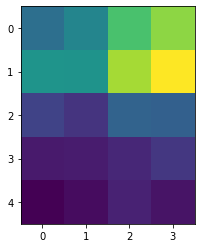

In [46]:
b = pd.crosstab(ce.JobLevel , columns = ce.JobSatisfaction)
print(b)
plt.imshow(b)
plt.show() 